## 10.3变分线性回归

<center>
    <img src="../pic/10_8.png" width="200" height="200">
</center>

在第3章讨论的线性回归中，w的似然函数为
$$p(t|w)=\sum_{n=1}^N\mathcal N(t_n|w^T\phi_n,\beta^{-1})$$
先验概率分布为$$p(w|\alpha)=\mathcal N(w|0,\alpha^{-1}I)$$

现在引入参数$\alpha$的先验概率分布，即均值已知，方差未知服从Gamma分布$$p(\alpha)=Gam(\alpha|\alpha_0,b_0)$$
则联合概率分布可以写成$$p(t,w,\alpha)=p(t|w)p(w|\alpha)p(\alpha)$$
为了寻找后验概率分布$p(w,\alpha|t)$的近似分布，分解变分后验概率分布:$$q(w,\alpha)=q(w)q(\alpha)$$

由变分框架可得:
$$\begin{align}lnq^*(\alpha)&=lnp(\alpha)+\mathbb E_w[lnp(w|\alpha)]+const\\&=(\alpha_0-1)ln\alpha-b_0\alpha+\frac{M}{2}ln\alpha-\frac{\alpha}{2}\mathbb E[w^Tw]+const\end{align}$$

$$\begin{align}lnq^*(w)&=lnp(t|w)+\mathbb E_{\alpha}[lnp(w|\alpha)]+const\\&=-\frac{\beta}{2}\sum_{n=1}^N\{w^T\phi_n-t_n\}^2-\frac{1}{2}\mathbb E[\alpha]w^Tw+const\\&=-\frac{1}{2}w^T(\mathbb E[\alpha]I+\beta\Phi^T\Phi)w+\beta w^T\Phi^Tt+const\end{align}$$

可以发现
$$ q^*(\alpha)=Gam(\alpha|a_N,b_N)$$
$$q^*(w)=\mathcal N(w|m_N,S_N)$$

更新规则 
* 计算$\alpha$,其中$\alpha_N=\alpha_0+\frac{M}{2}$,每次更新该值固定
* 计算$E[\alpha]=\frac{a_N}{b_N}$

  更新$S_N=(\mathbb E[\alpha]I+\beta\Phi^T\Phi)^{-1}$
  
  更新$m_N=\beta S_N\Phi^Tt$
  
  
* 计算$E[w^Tw]=m_Nm_N^T+S_N$
  
  更新$b_N=b_0+\frac{1}{2}\mathbb E[w^Tw]$

### 预测分布

$$\begin{align}p(t|\mathbf x,\mathbf t)&=\int p(t|\mathbf x,\mathbf w)p(\mathbf w|\mathbf t)d\mathbf w\\&=\int p(t|\mathbf x,\mathbf w)q(\mathbf w)d \mathbf w \\&=\int\mathcal N(t|\mathbf w^T\phi(x),\beta^{-1}\mathcal N(\mathbf w|m_N,S_N)d \mathbf w\\&=\mathcal N(t|m_N^T\phi(x),\sigma^2(\mathbf x))\end{align}$$

其中:
$$\sigma^2(x)=\frac{1}{\beta}+\phi(x)^TS_N\phi(x)$$

In [1]:
import sys
#sys.path
sys.path.append("../")
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from prml.rv import VariationalGaussianMixture
from prml.features import PolynomialFeatures
from prml.linear import (
    VariationalLinearRegressor,
    VariationalLogisticRegressor
)

np.random.seed(666)

In [2]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

#3次立方插值
def cubic(x):
    return x * (x - 5) * (x + 5)

x_train, y_train = create_toy_data(cubic, 10, 10., [-5, 5])
x = np.linspace(-5, 5, 100)
y = cubic(x)

feature = PolynomialFeatures(degree=3)
X_train = feature.transform(x_train)
X = feature.transform(x)

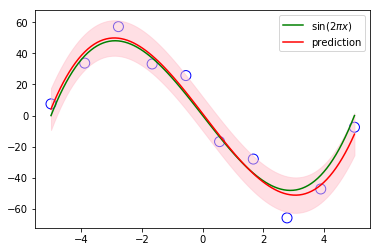

In [3]:
vlr = VariationalLinearRegressor(beta=0.01)
vlr.fit(X_train, y_train)
y_mean, y_std = vlr.predict(X, return_std=True)
plt.scatter(x_train, y_train, s=100, facecolor="none", edgecolor="b")
plt.plot(x, y, c="g", label="$\sin(2\pi x)$")
plt.plot(x, y_mean, c="r", label="prediction") 
plt.fill_between(x, y_mean - y_std, y_mean + y_std, alpha=0.5, color="pink")
plt.legend()
plt.show()